# EDA Time Series

In [2]:
# Install Pandas Data Reader
!pip install pandas-datareader

     -------------------------------------- 109.5/109.5 kB 3.2 MB/s eta 0:00:00


In [22]:
!pip install --upgrade pandas-datareader

In [2]:
pip install yfinance

     ---------------------------------------- 60.3/60.3 kB 1.6 MB/s eta 0:00:00
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [11]:
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
data = pdr.get_data_yahoo('TSLA', datetime(2017, 1, 1))

[*********************100%***********************]  1 of 1 completed


In [12]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500


<AxesSubplot:xlabel='Date'>

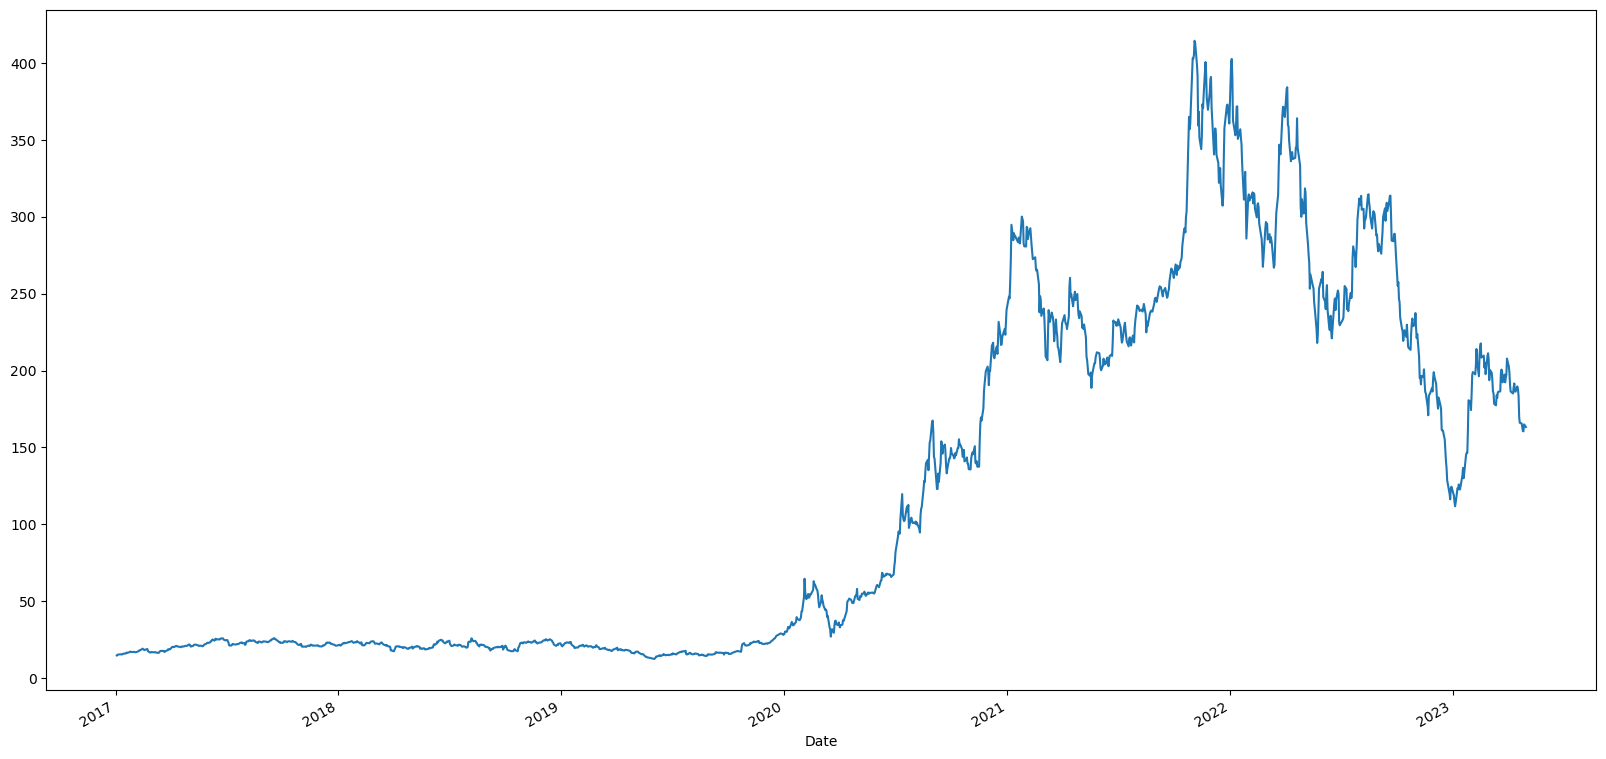

In [17]:
data['High'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

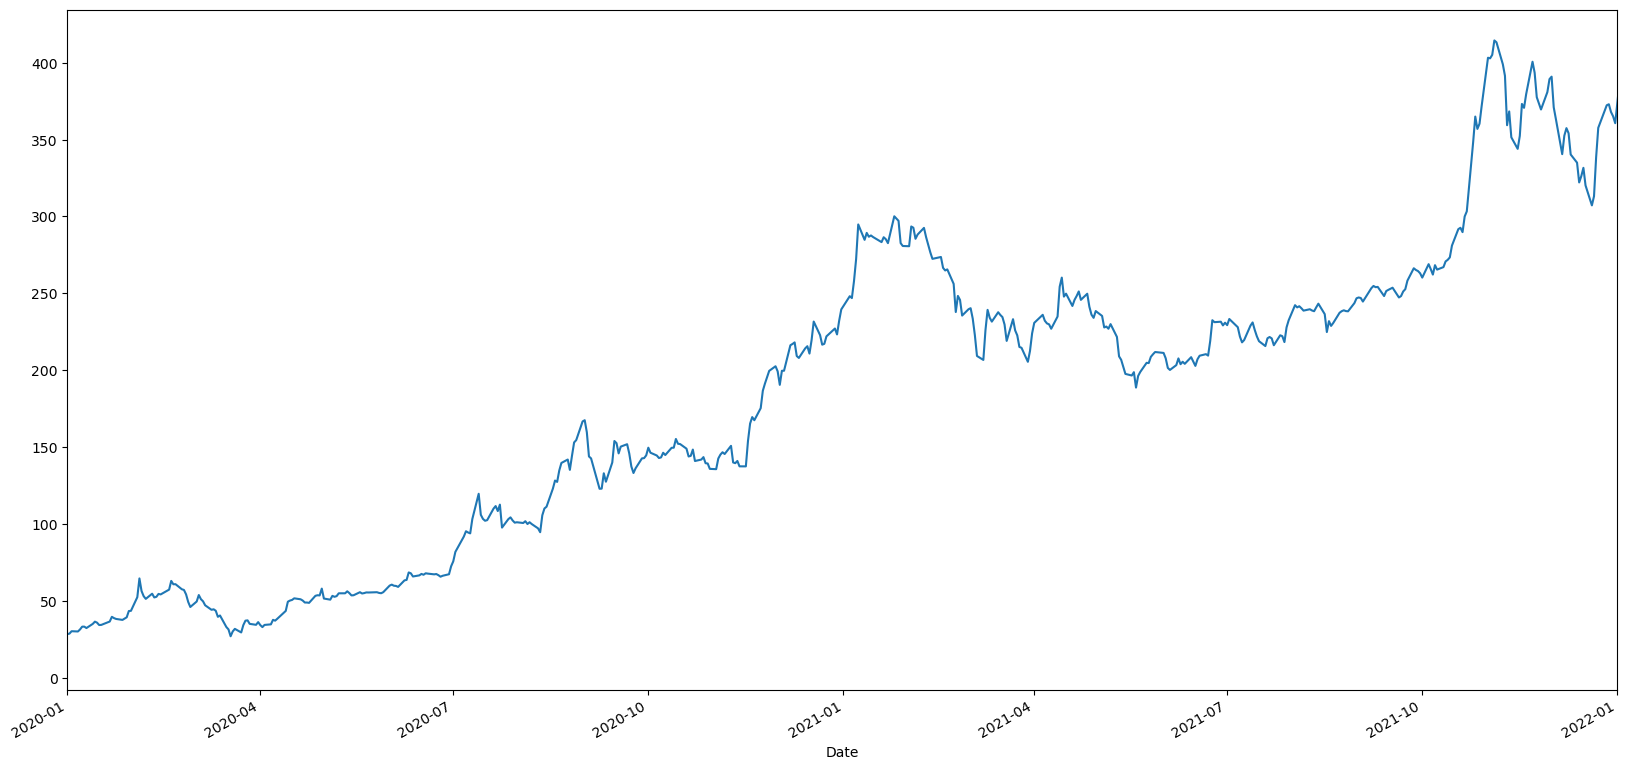

In [18]:
# We are really intreseted in the hike in share price from 2020 to 2022
# We define the xlimit and ylimit

data['High'].plot(xlim=['2020-01-01','2022-01-01'],figsize=(20,10))

<AxesSubplot:xlabel='Date'>

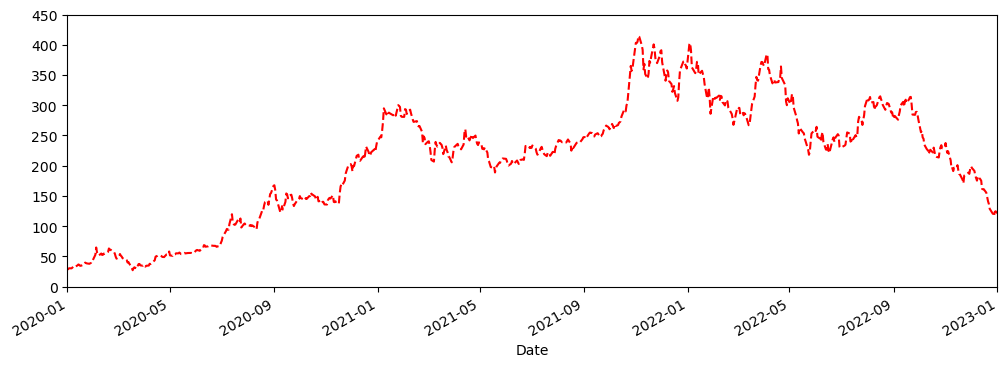

In [27]:
# Applying xlim and ylim along with color
data['High'].plot(xlim=['2020-01-01','2023-01-01'],ylim=[0,450],figsize=(12,4),c='red',ls='--')

In [30]:
data.iloc[:4]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500


In [31]:
index=data.loc['2020-01-01':'2021-09-01'].index
share_open=data.loc['2020-01-01':'2021-09-01']['Open']

In [32]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

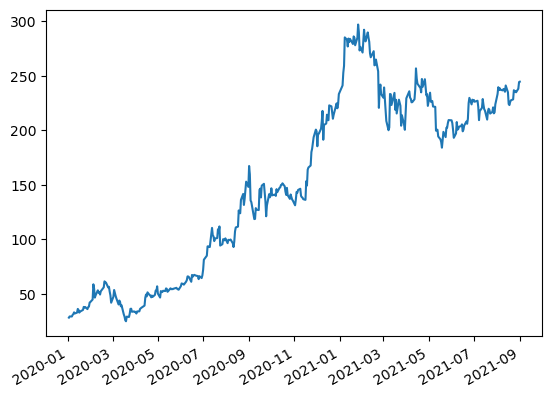

In [37]:
figure,axis=plt.subplots()
# To prevent overlapping we use autoformating inbuilt function
figure.autofmt_xdate()
axis.plot(index,share_open)

In [38]:
# Datetime index

In [40]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500


In [42]:
data.info() #datetime is not being displayed as in datetime format

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1592 entries, 2017-01-03 to 2023-05-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1592 non-null   float64
 1   High       1592 non-null   float64
 2   Low        1592 non-null   float64
 3   Close      1592 non-null   float64
 4   Adj Close  1592 non-null   float64
 5   Volume     1592 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 151.6 KB


In [43]:
data=data.reset_index()

In [44]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500
1,2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500
2,2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500
3,2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500
4,2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500


In [46]:
data.info() # datetime is being displayed as a seperate datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1592 non-null   datetime64[ns]
 1   Open       1592 non-null   float64       
 2   High       1592 non-null   float64       
 3   Low        1592 non-null   float64       
 4   Close      1592 non-null   float64       
 5   Adj Close  1592 non-null   float64       
 6   Volume     1592 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 87.2 KB


In [57]:
data=data.set_index('Date')

In [58]:
# Datetime
from datetime import datetime

In [59]:
datetime.now()

datetime.datetime(2023, 5, 2, 12, 54, 46, 639789)

# Time Resampling

In [60]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500


In [61]:
# to get the minimum of each column in the particular year that to on the last date of that paricular year
data.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500
2019-12-31,12.073333,12.445333,11.799333,11.931333,11.931333,36984000
2020-12-31,24.980000,26.990667,23.367332,24.081333,24.081333,52073100
2021-12-31,184.183334,188.736664,179.830002,187.666672,187.666672,29401800
2022-12-31,110.349998,116.269997,108.239998,109.099998,109.099998,41864700
2023-12-31,103.000000,111.750000,101.809998,108.099998,108.099998,92067000


In [62]:
# to get the maximum of each column in the particular year that to on the last date of that paricular year

# RULE "A" => Year End Frequency
data.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-31,396.516663,402.666656,378.679993,399.926666,399.926666,221923300
2023-12-31,211.759995,217.649994,206.110001,214.240005,214.240005,306590600


<AxesSubplot:xlabel='Date'>

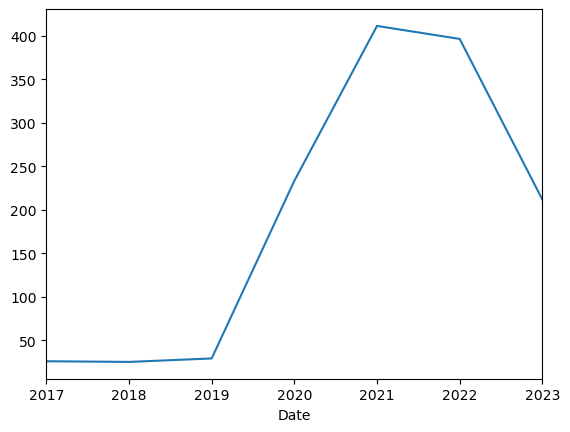

In [63]:
# Plotting this data
data.resample(rule='A').max()['Open'].plot()

In [64]:
# to get the maximum of each column in the particular Quater that to on the last date of that paricular Quater
data.resample(rule='QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,18.687332,19.159332,18.573999,18.732000,18.732000,223728000
2017-04-01,25.779333,25.799334,25.290001,25.563334,25.563334,258921000
2017-07-01,25.350000,25.974001,25.178667,25.666668,25.666668,289867500
2017-10-01,23.798668,24.200001,23.608667,23.976667,23.976667,296871000
2018-01-01,24.000000,24.033333,23.490667,23.827999,23.827999,315021000
2018-04-01,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-01,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000


<AxesSubplot:xlabel='Date'>

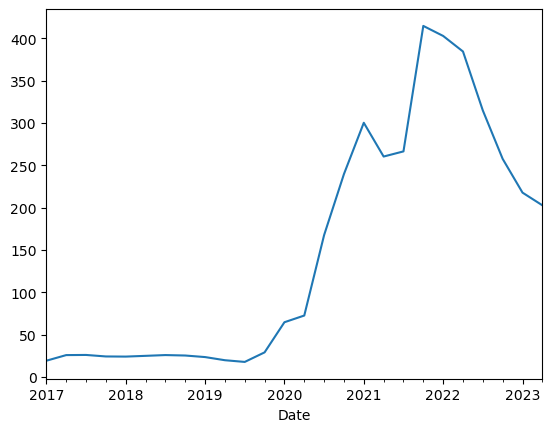

In [65]:
data.resample(rule='QS').max()['High'].plot()

In [66]:
# to get the maximum of Bussiness End frequency
data.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-30,396.516663,402.666656,378.679993,399.926666,399.926666,221923300
2023-12-29,211.759995,217.649994,206.110001,214.240005,214.240005,306590600


In [69]:
# to get the maximum of Bussiness End frequency Quaterly
data.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.687332,19.159332,18.573999,18.732000,18.732000,223728000
2017-04-03,25.779333,25.799334,25.290001,25.563334,25.563334,258921000
2017-07-03,25.350000,25.974001,25.178667,25.666668,25.666668,289867500
2017-10-02,23.798668,24.200001,23.608667,23.976667,23.976667,296871000
2018-01-01,24.000000,24.033333,23.490667,23.827999,23.827999,315021000
2018-04-02,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-02,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000


# Visualization

<AxesSubplot:xlabel='Date'>

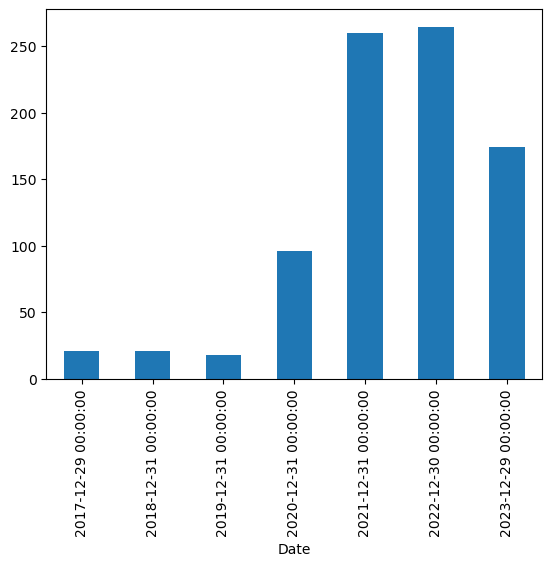

In [72]:
data['Open'].resample(rule='BA').mean().plot(kind='bar')

<AxesSubplot:ylabel='Open'>

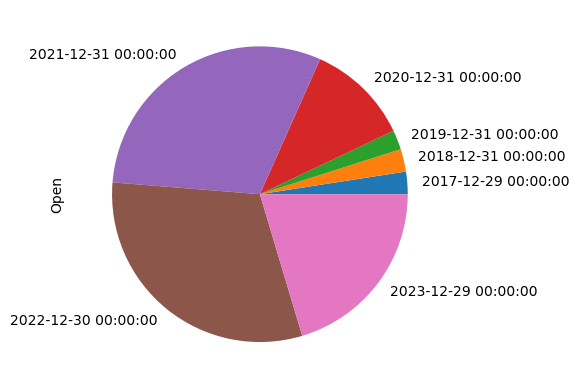

In [77]:
data['Open'].resample(rule='BA').mean().plot(kind='pie')

<AxesSubplot:xlabel='Date'>

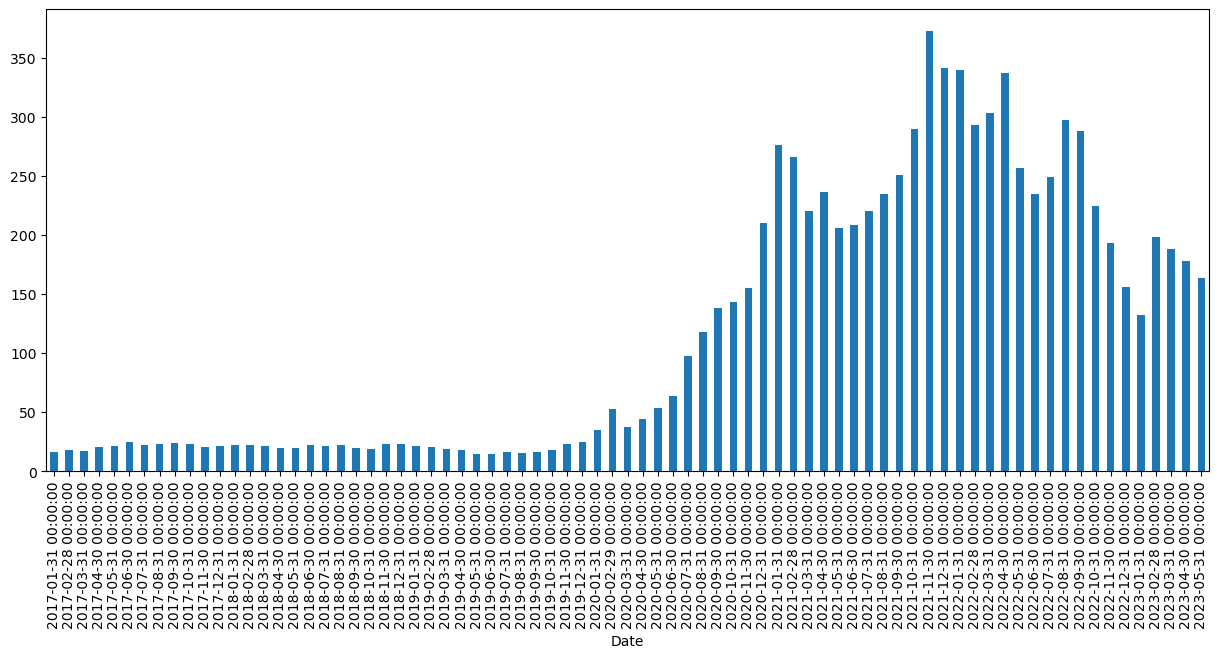

In [78]:
# Rule 'M' is used for the montly data 
data['Open'].resample(rule='M').mean().plot(kind='bar',figsize=(15,6))

# Rolling and Expanding

In [ ]:
# Rolling is used to get down the columns and getting the mean for the next 'n' columns
# Rolling window is used for the moving average

In [80]:
data['Open'].rolling(5).mean().head(10)

Date
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
2017-01-06          NaN
2017-01-09    14.825734
2017-01-10    15.054267
2017-01-11    15.245200
2017-01-12    15.280400
2017-01-13    15.321333
2017-01-17    15.424400
Name: Open, dtype: float64

In [81]:
data['High'].rolling(10).mean().head(20)

Date
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
2017-01-06          NaN
2017-01-09          NaN
2017-01-10          NaN
2017-01-11          NaN
2017-01-12          NaN
2017-01-13          NaN
2017-01-17    15.390200
2017-01-18    15.519400
2017-01-19    15.657267
2017-01-20    15.780733
2017-01-23    15.917933
2017-01-24    16.070467
2017-01-25    16.246867
2017-01-26    16.418600
2017-01-27    16.567267
2017-01-30    16.683533
2017-01-31    16.789734
Name: High, dtype: float64

In [82]:
data['Open: 30 days rolling']=data['Open'].rolling(30).mean()

In [83]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Date,,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,NaN
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,NaN
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,NaN
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,NaN
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,NaN


<AxesSubplot:xlabel='Date'>

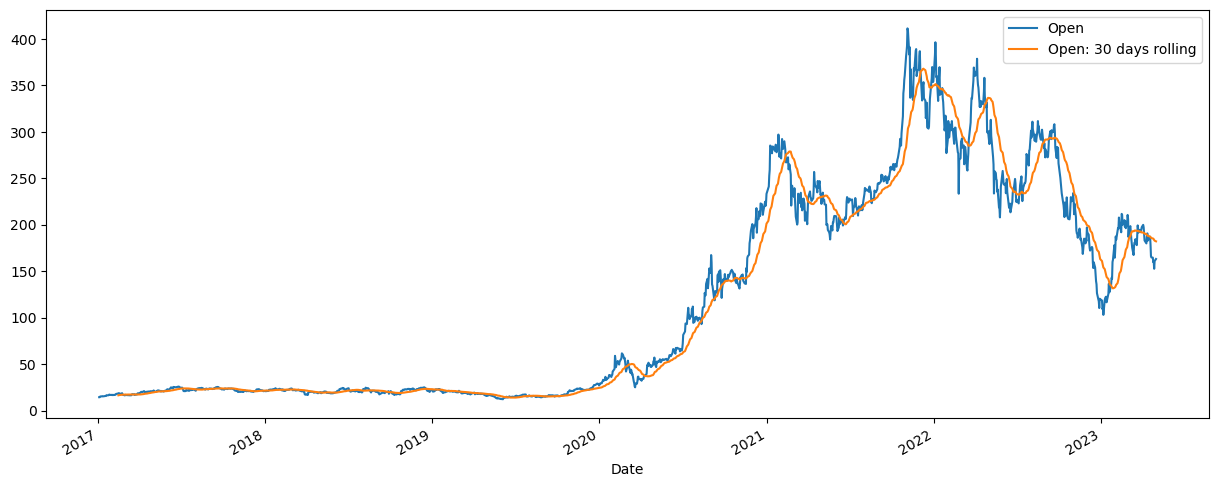

In [85]:
data[['Open','Open: 30 days rolling']].plot(figsize=(15,6))
# we can see that smoothing has been done